In [1]:
from FEM_solver import *
import os

# Convergence plots

No quad cells found


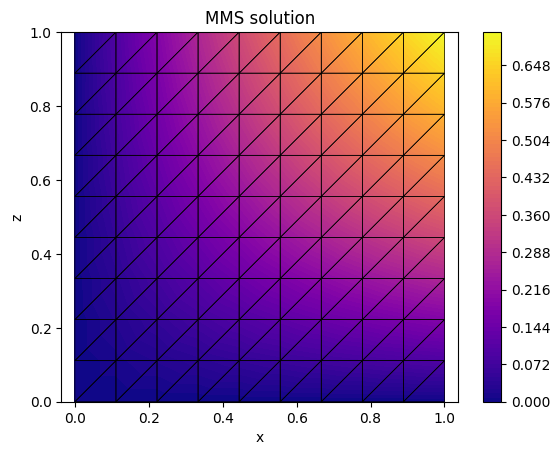

In [2]:
N = 10
mesh = mesh_gen_uniform_2D_grid(N, N, "triangle", xlim = [0,1], ylim = [0,1])
model = PoissonSolver(mesh, lambda x, y: -2*np.sin(x)*np.sin(y))

# Imposing Neumann BCs on left and right
grad = lambda x, y: np.array([np.cos(x)*np.sin(y), np.sin(x)*np.cos(y)])
model.impose_BC("Neumann", 1, grad)
model.impose_BC("Neumann", 2, grad)

# Imposing Dirichlet BCs on top and bed
model.impose_BC("Dirichlet", 3, lambda x, y: np.sin(x)*np.sin(y))
model.impose_BC("Dirichlet", 4, lambda x, y: np.sin(x)*np.sin(y))

model.solve()
model.plot_solution(title = "MMS solution")

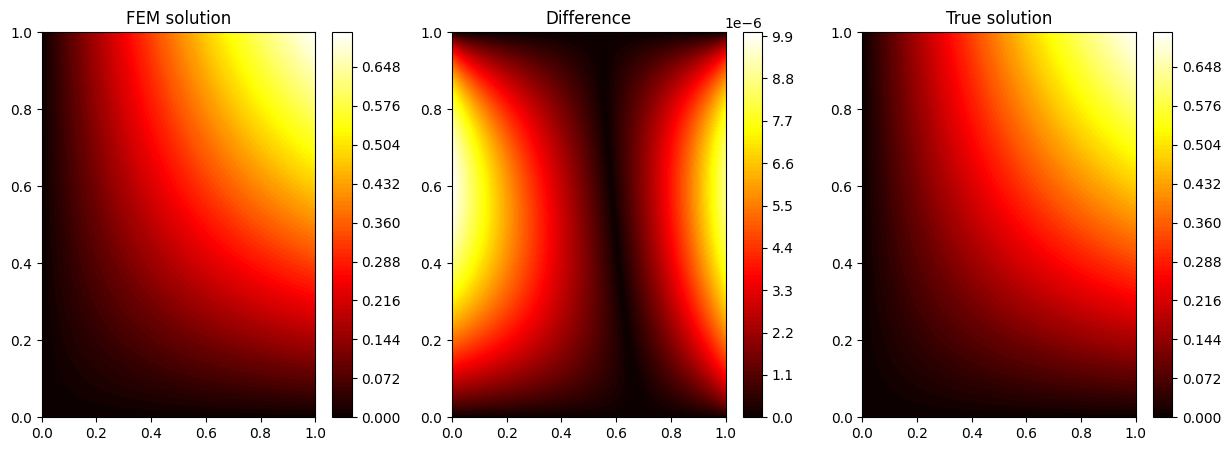

In [10]:
true_sol_lam = lambda x, y: np.sin(x)*np.sin(y)
coords = model.coords
true_sol = true_sol_lam(coords[:,0], coords[:,1])
true_sol = true_sol.reshape(N**2,)

diff = np.abs(model.sol - true_sol)
diff = diff.reshape(N, N)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].contourf(model.sol.reshape(N, N), cmap='hot', levels = 100, extent = [0,1,0,1])
ax[0].set_title("FEM solution")
ax[1].contourf(diff, cmap='hot', levels = 100, extent = [0,1,0,1])
ax[1].set_title("Difference")
ax[2].contourf(true_sol.reshape(N, N), cmap='hot', levels = 100, extent = [0,1,0,1])
ax[2].set_title("True solution")

plt.colorbar(ax[0].collections[0], ax=ax[0])
plt.colorbar(ax[1].collections[0], ax=ax[1])
plt.colorbar(ax[2].collections[0], ax=ax[2])

In [55]:
true_sol_lam(0, 7)

np.float64(0.0)